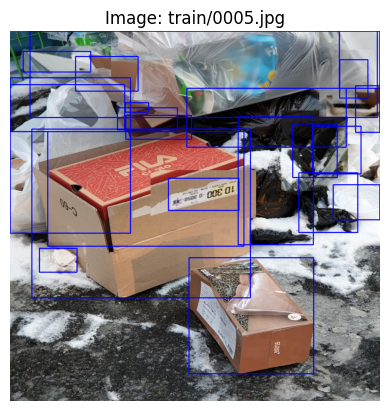

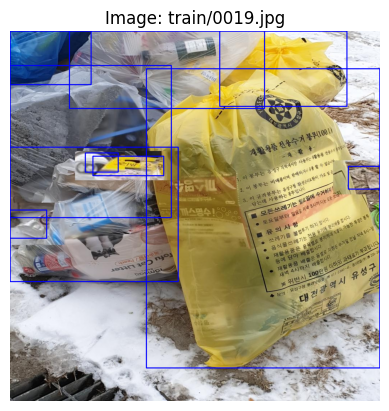

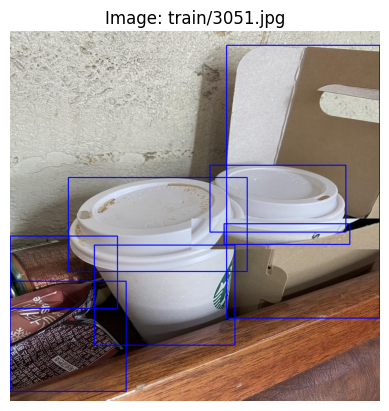

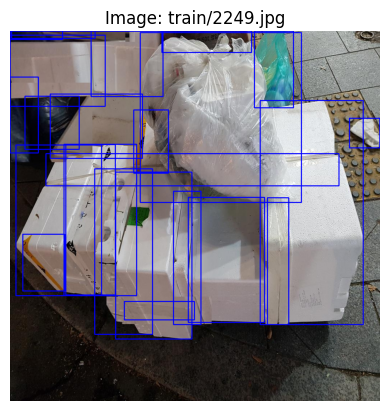

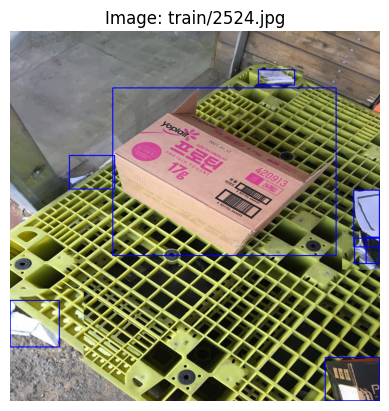

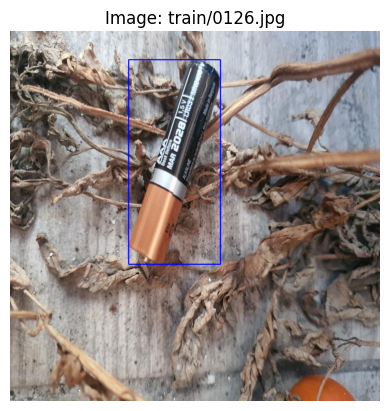

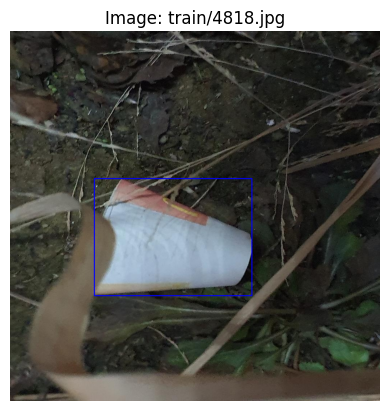

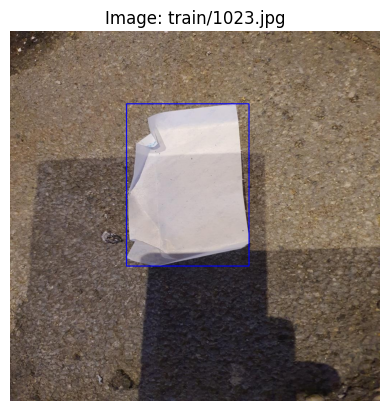

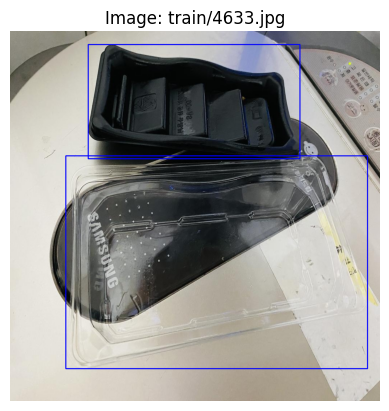

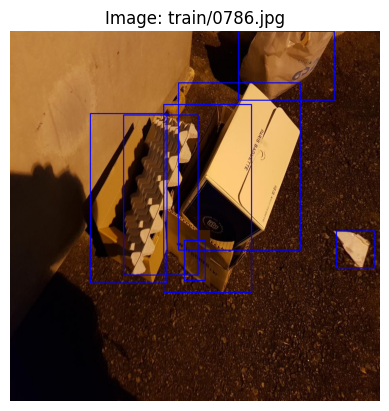

In [2]:
import json
import cv2
import os
import random
import matplotlib.pyplot as plt

def load_coco_annotations(json_path):
    # COCO 스타일 JSON 파일을 로드
    with open(json_path, 'r') as f:
        coco_data = json.load(f)
    return coco_data

def get_image_annotations(image_id, coco_data):
    # 주어진 image_id에 해당하는 모든 annotation 검색
    annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]
    return annotations

def draw_bbox(image, bbox, color=(255, 0, 0), thickness=2):
    # bbox 그리기
    x, y, width, height = map(int, bbox)
    top_left = (x, y)
    bottom_right = (x + width, y + height)
    cv2.rectangle(image, top_left, bottom_right, color, thickness)

def show_images_with_bboxes(coco_data, images_dir, num_images=10, user_images=None):
    # 사용자가 입력한 이미지가 있으면 우선 추가
    selected_images = []

    if user_images:
        for user_image in user_images:
            # 사용자가 입력한 이미지 파일을 찾음
            image_info = next((img for img in coco_data['images'] if img['file_name'] == user_image), None)
            if image_info:
                selected_images.append(image_info)
            else:
                print(f"Image {user_image} not found in COCO dataset. Skipping.")
    
    # 나머지는 랜덤으로 선택하여 추가
    remaining_num_images = num_images - len(selected_images)
    if remaining_num_images > 0:
        random_images = random.sample(coco_data['images'], remaining_num_images)
        selected_images.extend(random_images)

    # 이미지 출력
    for image_info in selected_images:
        image_id = image_info['id']
        file_name = image_info['file_name']
        image_path = os.path.join(images_dir, file_name)

        # 이미지 로드
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image {image_path}. Skipping.")
            continue
        
        # 해당 이미지의 바운딩 박스 가져오기
        annotations = get_image_annotations(image_id, coco_data)

        # 바운딩 박스 그리기
        for annotation in annotations:
            bbox = annotation['bbox']
            draw_bbox(image, bbox)

        # 이미지를 matplotlib으로 표시
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {file_name}")
        plt.axis('off')  # 축 숨기기
        plt.show()

if __name__ == "__main__":
    # JSON 파일과 이미지 디렉토리 경로 설정
    json_path = "/data/ephemeral/home/sr_dataset/output_train/modified_annotations.json"
    images_dir = "/data/ephemeral/home/sr_dataset/output_train"

    # 사용자가 입력한 이미지 목록 (file_name 형식)
    user_images = [
        "train/0005.jpg",  # 예시: 사용자가 보고 싶은 이미지 파일명
        "train/0019.jpg",
        "train/3051.jpg",
    ]

    # COCO 데이터셋 로드
    coco_data = load_coco_annotations(json_path)

    # 사용자 입력 이미지 포함하여 랜덤으로 이미지와 바운딩 박스 표시
    show_images_with_bboxes(coco_data, images_dir, num_images=10, user_images=user_images)
